In [2]:
# 3IIR - G4_11
# Elbikri Idriss
# Disney

Ce Projet va etre diviser en trois sous parties :
  1. Exploration des données.
  2. Répondre aux questions.
  3. Visualisations.

In [3]:
# Importation des bibliothèques nécessaires :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
#pd.set_option('max_colonnes', 200) //Pour fixer le nombre des colonnes a afficher

In [4]:
# Integration du fichier qui contient notre data :
df=pd.read_csv('https://raw.githubusercontent.com/EMSIMa/ADD3IIR/main/Projet/Datasets/disney.csv')

  1. Exploration des données.

In [5]:
# Affichage des 5 premieres ligne de notre data :
df.head()
# on peut aussi presiser le nombre de ligne q'on veut afficher par => df.head(nbr) //ou nbr representre le nombre de ligne
#ou bien afficher toutes notre data par => df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [6]:
# Affichage des Informations sur notre dataset (types de données, nombres de non-valeurs, etc.)
df.info()
# df.shape : Donne le nombre des lignes et des colonnes.
# df.dtypes : Affiche chaque colonne est sont type.
# df.columns : Affiche tous les colonnes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [7]:
# Resume des information sur les donnees numerique de notre dataframe.
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [8]:
# Pour voir si les champs sont vide ou pas.
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,False,False,False,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False,False,False,False
1447,False,False,False,False,False,False,False,False,False,False,False,False
1448,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Pour voir si les champs sont vide ou pas.
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
# Pour voir si notre data ne contient pas des valeur dupliquer
df.loc[df.duplicated()].sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: object

  2. Répondre aux questions

Question 1: Visualisation des Top 5 Catégories.

In [11]:
# liste des occurence des categories realisees
df['listed_in'].value_counts().head()

listed_in
Animation, Comedy, Family                124
Action-Adventure, Animation, Comedy       77
Action-Adventure, Animation, Kids         45
Action-Adventure, Animation, Family       40
Animals & Nature, Documentary, Family     40
Name: count, dtype: int64

<ipython-input-12-6e4d5c4acc32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories.index, y=categories.values, palette='viridis') # dessiner un graph


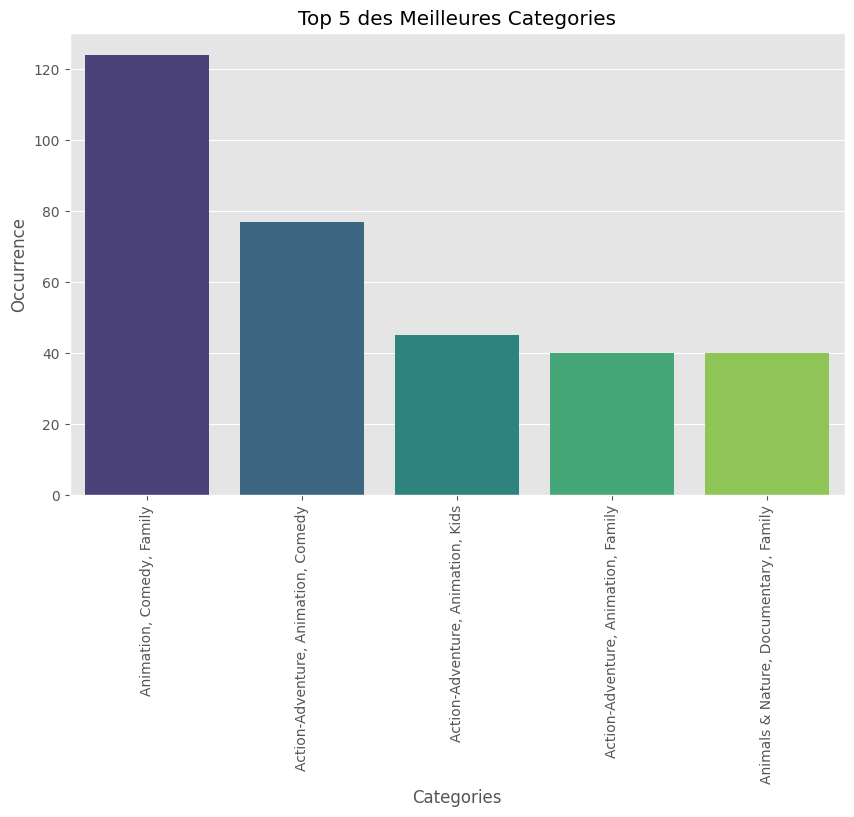

In [12]:
categories = df['listed_in'].value_counts().head(5)
plt.figure(figsize=(10,6)) # pour determiner la taille de la figure
sns.barplot(x=categories.index, y=categories.values, palette='viridis') # dessiner un graph
plt.title('Top 5 des Meilleures Categories') # titre de la figure
plt.xlabel('Categories') # titre de l'axe des abscisses
plt.ylabel('Occurrence') # titre de l'axe des ordonnees
plt.xticks(rotation=90)
plt.show()

Question 2: Top 5 des réalisateurs.

In [13]:
# liste des creation par un realisateur
df['director'].value_counts().head()

director
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
Name: count, dtype: int64

<ipython-input-14-2a320386c0dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='magma') # dessiner un graph


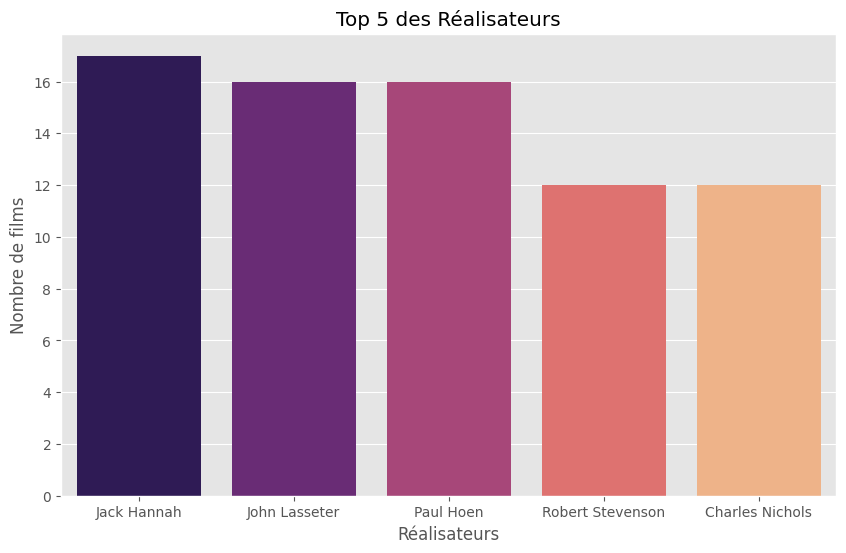

In [14]:
top_directors = df['director'].value_counts().head(5)
plt.figure(figsize=(10,6)) # pour determiner la taille de la figure
sns.barplot(x=top_directors.index, y=top_directors.values, palette='magma') # dessiner un graph
plt.title('Top 5 des Réalisateurs')  # titre de la figure
plt.xlabel('Réalisateurs') # titre de l'axe des abscisses
plt.ylabel('Nombre de films') # titre de l'axe des ordonnees
plt.show()

Question 3: Les dix meilleurs acteurs.

In [15]:
# recuperation du premier champs dans la colonne cast
acteurs = []
for i in df['cast']:
    if isinstance(i, str):  # Vérifier si la valeur est une chaîne de caractères
        i = i.split(',')[0]  # Si oui, utiliser split() pour séparer la chaîne en une liste, puis récupérer le premier élément
    acteurs.append(i)
df['acteurs'] = acteurs
acteurs # la liste qu'on a cree

['Chris Diamantopoulos',
 'Jim Varney',
 'Raymond Albert Romano',
 'Darren Criss',
 'John Lennon',
 'Jacques Yves Cousteau',
 'Jeremy Renner',
 'Gary Muehlberger',
 'Dr. Ray Ball',
 'Steve Whitmire',
 'Don Hahn',
 nan,
 'Stacy Keach',
 'Dr. Michelle Oakley',
 'Michael B. Jordan',
 nan,
 'Jack Dylan Grazer',
 'Mia Jenness',
 'Carolina Domenech',
 'Amy Adams',
 'Stephen Apostolina',
 'Kristen Bell',
 'Walt Disney',
 'Ellie Kemper',
 'Dwayne Johnson',
 'Chris Hemsworth',
 nan,
 nan,
 'Josh Gad',
 'John Kahrs',
 'Pete Docter',
 'Simu Liu',
 'Avantika',
 'Mandy Moore',
 'Billy Connolly',
 nan,
 'Billie Eilish',
 'Kyla Pratt',
 'Dan Castellaneta',
 nan,
 nan,
 nan,
 'Jason Lee',
 'Arnold Schwarzenegger',
 'Larry the Cable Guy',
 'Betty White',
 'Christopher Lloyd',
 'Dominic Scott Kay',
 'F.T. Anderson',
 'Resse Alexander',
 'James McAvoy',
 'Justin Felbinger',
 'Joel Sartore',
 nan,
 nan,
 'Kevin Costner',
 'Thomas Ian Nicholas',
 'Gino Conforti',
 'Kyle Breitkopf',
 nan,
 'Dr. Albert Yu-Mi

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,acteurs
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Chris Diamantopoulos
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Jim Varney
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Raymond Albert Romano
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Darren Criss
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,John Lennon


In [17]:
df['acteurs'].value_counts().head(10)

acteurs
Walt Disney             15
Larry the Cable Guy     12
Tony Hale               11
Tom Hanks               10
Winston Hibler          10
Jim Cummings             9
Dan Nachtrab             7
Tom Kane                 7
Robert Downey Jr.        7
Dean Jones               6
Name: count, dtype: int64

<ipython-input-19-50c996843948>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_acteurs.index, y=top_acteurs.values, palette='magma')


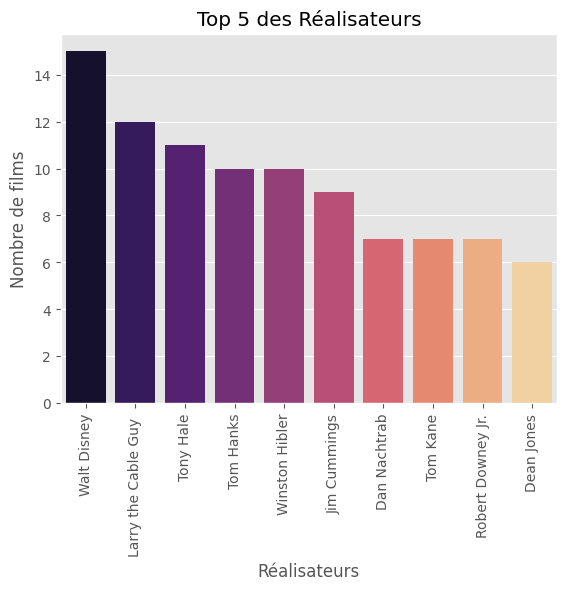

In [19]:
top_acteurs=df['acteurs'].value_counts().head(10)

sns.barplot(x=top_acteurs.index, y=top_acteurs.values, palette='magma')
plt.title('Top 5 des Réalisateurs')  # titre de la figure
plt.xlabel('Réalisateurs') # titre de l'axe des abscisses
plt.ylabel('Nombre de films') # titre de l'axe des ordonnees
plt.xticks(rotation=90)
plt.show()

Question 4: Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

In [21]:
#extraire les séries TV du DataFrame
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons
tvs = tv_shows.sort_values("duration", ascending=False)

#afficher les cinq séries TV avec le plus grand nombre de saisons
tops = tvs.head(5)
print(tops[["show_id","title", "duration"]])

    show_id                           title   duration
553    s554  America's Funniest Home Videos  9 Seasons
125    s126        Dr. K's Exotic Animal ER  9 Seasons
557    s558                     Brain Games  8 Seasons
285    s286                         Car SOS  8 Seasons
759    s760                 Boy Meets World  7 Seasons


Question 5: Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Suppression des lignes avec des données manquantes dans la colonne 'description'
#data = data.dropna(subset=['description'])
# TF-IDF des descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'].dropna()) #en cas d'utilisation du supression en haut ici on met: tfidf_matrix = tfidf.fit_transform(data['description'])

# Calcul de la matrice de similarité cosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df.index[df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar contents
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Exemple d'utilisation
print(get_recommendations('Ernest Saves Christmas'))

49                   The Search for Santa Paws
1393                            Twas the Night
45      Prep & Landing: Operation Secret Santa
1330                          The Santa Clause
622                          My Dog, the Thief
Name: title, dtype: object


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

#créer un vecteur de caractéristiques pour les descriptions des contenus
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['description'].fillna(''))

#calculer la similarité cosinus entre chaque paire de contenus
cosine_sim = cosine_similarity(features)

#trouver les contenus similaires à "The Marvelous Mrs. Maisel"
title = "Ernest Saves Christmas"
index = df[df['title'] == title].index[0]
similar_content = list(enumerate(cosine_sim[index]))
sorted_similar_content = sorted(similar_content,key=lambda x:x[1],reverse=True)[1:10]

#afficher les contenus similaires
print("Contenus similaires à ", title)
for content in sorted_similar_content:
    print(df.iloc[content[0]]['title'])

Contenus similaires à  Ernest Saves Christmas
The Search for Santa Paws
Twas the Night
The Santa Clause
D3: The Mighty Ducks
Mr. Boogedy
Disney's Little Einsteins
Disney Vampirina
Ice Age: A Mammoth Christmas
Disney Junior T.O.T.S.


Question 6: Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

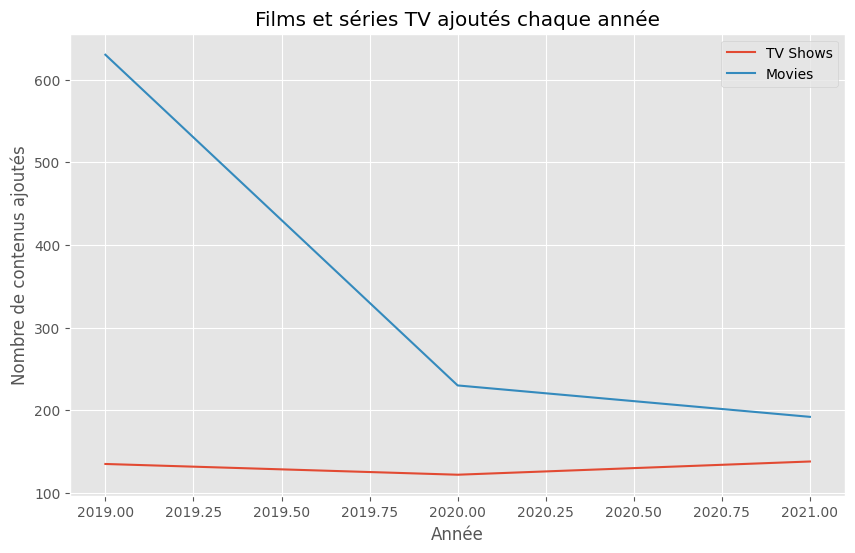

In [28]:
#comparer le nombre de films et de séries TV ajoutés chaque année
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
tv_shows_added = df[df["type"] == "TV Show"].groupby('year_added').size()
movies_added = df[df["type"] == "Movie"].groupby('year_added').size()

#tracer un graphique pour comparer le nombre de films et de séries TV ajoutés chaque année
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tv_shows_added.index, tv_shows_added.values, label='TV Shows')
ax.plot(movies_added.index, movies_added.values, label='Movies')
ax.set_title('Films et séries TV ajoutés chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de contenus ajoutés')
ax.legend()
plt.show()

In [31]:
df['type'].value_counts().head(5)
#d'apres ce qui precedent on peut dire que Disney ne se concentre pas d'avantage sur les séries télévisées que sur les films ces dernières années

type
Movie      1052
TV Show     398
Name: count, dtype: int64

3. Visualisations.

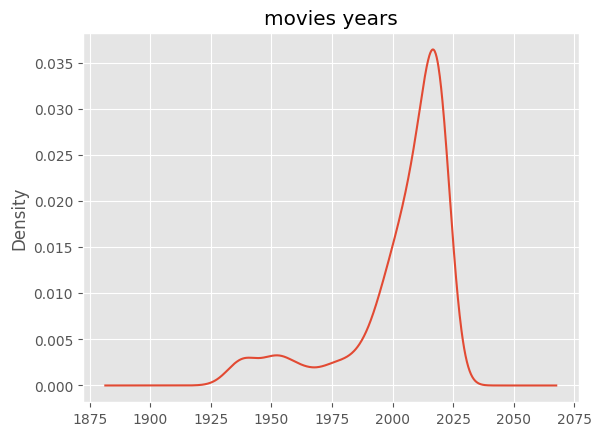

In [22]:
# pour voir l'evolution des films/series au cours des annees
ax = df['release_year'].plot(kind='kde',title="movies years")